In [1]:
import tensorflow
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import TimeDistributed
from keras.layers import SimpleRNN

Using TensorFlow backend.


In [2]:
PNG_PATH = "/home/ryo/Área de Trabalho/PIBIC/Database/img/"
NPZ_PATH = "/home/ryo/Área de Trabalho/PIBIC/Database/npz/"

In [3]:
circle = np.load(NPZ_PATH + 'bubbles.npz')
square = np.load(NPZ_PATH + 'square.npz')

In [4]:
circle_images = circle.f.arr_0
square_images = square.f.arr_0

In [5]:
circle_images[:2]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [6]:
square_images[:2]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [7]:
train_cir_img = circle_images[:80]
train_sqr_img = square_images[:80]
test_cir_img = circle_images[80:100]
test_sqr_img = square_images[80:100]

In [8]:
train_cir_sqr_img = np.concatenate((train_cir_img, train_sqr_img))
test_cir_sqr_img = np.concatenate((test_cir_img, test_sqr_img))

In [9]:
# o array tem 100 imagens de circulo e 100 de quadrados com formato 50x50
print(len(train_cir_sqr_img))
print(len(test_cir_sqr_img))

160
40


In [10]:
train_images_target = []
test_images_target = []
for i in range(80):
    zero_um = (0,1)
    train_images_target.append(zero_um)
    
for i in range(80):
    um_zero = (1,0)
    train_images_target.append(um_zero)
    
for i in range(20):
    zero_um = (0,1)
    test_images_target.append(zero_um)
    
for i in range(20):
    um_zero = (1,0)
    test_images_target.append(um_zero)

In [11]:
X = np.reshape(train_cir_sqr_img, (160, 50, 50))
y = np.array(train_images_target)

In [12]:
import math
n_input_layer = 2500
n_output_layer = 1
n_hidden_layer = round(math.sqrt((n_input_layer*n_output_layer)))
print("nro de neurônios na hidden layer:", n_hidden_layer)

nro de neurônios na hidden layer: 50


In [13]:
from keras.callbacks import EarlyStopping
from matplotlib import pyplot

In [25]:
model=Sequential()
model.add(SimpleRNN(n_hidden_layer, 
                    input_shape=(50,50), 
                    kernel_initializer='random_normal',
                    stateful = True,
                    batch_size = 1
                    ))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss = 'mse', optimizer = 'rmsprop')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (1, 50)                   5050      
_________________________________________________________________
dense_4 (Dense)              (1, 2)                    102       
Total params: 5,152
Trainable params: 5,152
Non-trainable params: 0
_________________________________________________________________


In [21]:
'''
model=Sequential()
model.add(SimpleRNN(n_hidden_layer, 
                    input_shape=(50,50), 
                    kernel_initializer='random_normal'))
model.add(Dense(2, activation='sigmoid'))
# model.compile(loss = 'mse', optimizer = 'rmsprop')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
'''

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 102       
Total params: 5,152
Trainable params: 5,152
Non-trainable params: 0
_________________________________________________________________


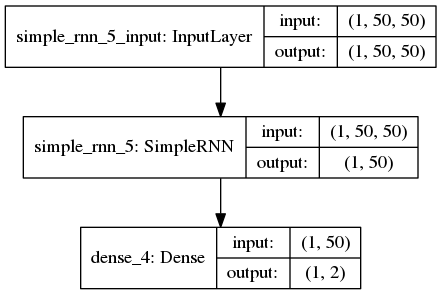

In [26]:
from keras.utils.vis_utils import plot_model
import graphviz
from interface import implements, Interface
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [27]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [29]:
history = model.fit(X, y, epochs = 100, batch_size = 1, callbacks=[es])

Epoch 1/100
160/160 [==============================] - 2s 11ms/step - loss: 0.2224
Epoch 2/100
 15/160 [=>............................] - ETA: 1s - loss: 0.1993

/home/ryo/miniconda/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


160/160 [==============================] - 2s 11ms/step - loss: 0.2063
Epoch 3/100
160/160 [==============================] - 2s 11ms/step - loss: 0.1541
Epoch 4/100
160/160 [==============================] - 2s 12ms/step - loss: 0.1027
Epoch 5/100
160/160 [==============================] - 2s 11ms/step - loss: 0.1033
Epoch 6/100
160/160 [==============================] - 2s 14ms/step - loss: 0.0718
Epoch 7/100
160/160 [==============================] - 2s 11ms/step - loss: 0.0678
Epoch 8/100
160/160 [==============================] - 2s 13ms/step - loss: 0.0527
Epoch 9/100
160/160 [==============================] - 2s 10ms/step - loss: 0.0688
Epoch 10/100
160/160 [==============================] - 2s 12ms/step - loss: 0.0489
Epoch 11/100
160/160 [==============================] - 2s 11ms/step - loss: 0.0459
Epoch 12/100
160/160 [==============================] - 2s 11ms/step - loss: 0.0370
Epoch 13/100
160/160 [==============================] - 2s 12ms/step - loss: 0.0270
Epoch 14/100

160/160 [==============================] - 2s 10ms/step - loss: 5.1642e-11
Epoch 98/100
160/160 [==============================] - 2s 12ms/step - loss: 4.9622e-11
Epoch 99/100
160/160 [==============================] - 2s 10ms/step - loss: 7.9758e-11
Epoch 100/100
160/160 [==============================] - 2s 11ms/step - loss: 7.5887e-11


In [41]:
len(X[0])

50

In [30]:
# list all data in history
print(history.history.keys())

dict_keys(['loss'])


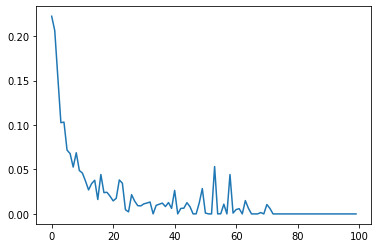

In [32]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['accuracy'], label='accuracy')

In [33]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [46]:
test = np.reshape(test_cir_sqr_img, (40, 50, 50))
test_target = np.array(test_images_target)

In [58]:
test_images_target

[(0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0)]

In [47]:
predictions = model.predict(test_cir_sqr_img, batch_size=1)
for i in range(len(test)):
    print(predictions[i], 'expected', test_target[i])

[6.4162227e-06 9.9999464e-01] expected [0 1]
[6.384812e-06 9.999945e-01] expected [0 1]
[6.5351900e-04 9.9924064e-01] expected [0 1]
[6.1288533e-06 9.9999499e-01] expected [0 1]
[6.6176594e-06 9.9998784e-01] expected [0 1]
[7.256333e-06 9.999945e-01] expected [0 1]
[3.8993767e-06 9.9999642e-01] expected [0 1]
[2.4220337e-06 9.9999595e-01] expected [0 1]
[5.6772842e-06 9.9999523e-01] expected [0 1]
[1.9308070e-05 9.9997103e-01] expected [0 1]
[8.6231803e-06 9.9999416e-01] expected [0 1]
[5.0582562e-06 9.9999523e-01] expected [0 1]
[5.077627e-06 9.999963e-01] expected [0 1]
[7.7114428e-06 9.9999404e-01] expected [0 1]
[9.729016e-06 9.999918e-01] expected [0 1]
[3.3089084e-06 9.9999666e-01] expected [0 1]
[1.4875901e-05 9.9998605e-01] expected [0 1]
[7.751893e-06 9.999951e-01] expected [0 1]
[1.0286129e-05 9.9998498e-01] expected [0 1]
[4.6140460e-05 9.9997187e-01] expected [0 1]
[9.999931e-01 8.674856e-06] expected [1 0]
[9.9999726e-01 3.7054472e-06] expected [1 0]
[9.9999440e-01 1.42930

In [48]:
test_target_arr = np.array(test_target)

In [57]:
test_target

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])

In [49]:
predictions_rounded = np.matrix.round(predictions)

In [50]:
y_test_classes = test_target_arr.argmax(1)
y_pred_classes = predictions_rounded.argmax(1)

In [51]:
y_pred_classes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [52]:
y_test_classes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [53]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_pred_classes, y_test_classes)

In [54]:
print(matrix)

[[20  0]
 [ 0 20]]
